In [72]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Create initial Rewards

In [73]:
#This will be the initial true mean for all our arms.
true_mean=np.random.randn(1)

true_mean_for_ten_arms= [true_mean]*10

#number of possible rewards in each distribution:-
n=500

#Now we generate each arms reward distribution.
reward= np.zeros((10,n))

for i in range(10):
    for j in range(n):
        reward[i][j]= true_mean_for_ten_arms[i] + np.random.randn()
        
#These will act as the initial true mean and initial reward distributions

In [74]:

#if two arms have the same Q value, then we will prefer the arm at the lower index.
#players are independent of each other, hence we reset all values for every player.
#Assuming 'e' will only have 2 decimal points. ==> 0.xy or 0.x form only
e= 0.1

trials=2000
steps=1000

R_time_0=np.zeros((10,steps)) #Sum of reward for every arm over 2000 trials at every time step t.
N_time_0=np.zeros((10,steps)) #Number of times, an arm is picked at time 't' over all 2000 trials.



#Keep record of Rt for every player, so you can calculate average Rt.
Rt_for_every_player_0= np.zeros((2000,steps))

#Generate a list, to get explore ith probabilty 'e' and 'exploit' with probability '1-e'.

L=  ['exploit']*(int(100*(1-e))) + (['explore']*(int(100*e)))
random.shuffle(L)




for player in range(2000):
    
    N=[0]*10
    Q=[0]*10
    
    for t in range(steps):
        
        what_to_do_pos= np.random.randint(100)
        what_to_do= L[what_to_do_pos]

        if(what_to_do=='exploit'):
            arm_to_pick= np.argmax(Q)

        else:
            arm_to_pick= np.random.randint(10)


        #Each arm has n values in its distribution and we need to randomly pick one.

        #Now we got our reward at time step t.
        Rt= reward[arm_to_pick][np.random.randint(n)]

        #Now we update the Q value for this arm which we picked

        temp= Q[arm_to_pick]*N[arm_to_pick]
        temp+=Rt
        N[arm_to_pick]+=1
        Q[arm_to_pick]= temp/N[arm_to_pick]

        #Note the reward received at time 't' for every player.
        Rt_for_every_player_0[player][t]=Rt
        
        #For plotting expected value for every arm as a function of time steps.
        R_time_0[arm_to_pick][t]+=Rt
        N_time_0[arm_to_pick][t]+=1
        
        
        #Now we increment true_mean_for_ten_arms and their reward distributions as given.
        for k in range(10):
            true_mean_for_ten_arms[k]+= np.random.normal(0,0.01)    
        n=500
        #Now we update each arm's reward distribution.
        reward= np.zeros((10,n))
        for k in range(10):
            for j in range(n):
                reward[i][j]= true_mean_for_ten_arms[i] + np.random.randn()
                
    print(player, "is Done")
                
                
#We need average reward for every time step.
average_reward_list_0=[]
for t in range(steps):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_0[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_0.append(average_reward_at_t)




0 is Done
1 is Done
2 is Done
3 is Done
4 is Done
5 is Done
6 is Done
7 is Done
8 is Done
9 is Done
10 is Done
11 is Done
12 is Done
13 is Done
14 is Done
15 is Done
16 is Done
17 is Done
18 is Done
19 is Done
20 is Done
21 is Done
22 is Done
23 is Done
24 is Done
25 is Done
26 is Done
27 is Done
28 is Done
29 is Done
30 is Done
31 is Done
32 is Done
33 is Done
34 is Done
35 is Done
36 is Done
37 is Done
38 is Done
39 is Done
40 is Done
41 is Done
42 is Done
43 is Done
44 is Done
45 is Done
46 is Done
47 is Done
48 is Done
49 is Done
50 is Done
51 is Done
52 is Done
53 is Done
54 is Done
55 is Done
56 is Done
57 is Done
58 is Done
59 is Done
60 is Done
61 is Done
62 is Done
63 is Done
64 is Done
65 is Done
66 is Done
67 is Done
68 is Done
69 is Done
70 is Done
71 is Done
72 is Done
73 is Done
74 is Done
75 is Done
76 is Done
77 is Done
78 is Done
79 is Done
80 is Done
81 is Done
82 is Done
83 is Done
84 is Done
85 is Done
86 is Done
87 is Done
88 is Done
89 is Done
90 is Done
91 is Don

692 is Done
693 is Done
694 is Done
695 is Done
696 is Done
697 is Done
698 is Done
699 is Done
700 is Done
701 is Done
702 is Done
703 is Done
704 is Done
705 is Done
706 is Done
707 is Done
708 is Done
709 is Done
710 is Done
711 is Done
712 is Done
713 is Done
714 is Done
715 is Done
716 is Done
717 is Done
718 is Done
719 is Done
720 is Done
721 is Done
722 is Done
723 is Done
724 is Done
725 is Done
726 is Done
727 is Done
728 is Done
729 is Done
730 is Done
731 is Done
732 is Done
733 is Done
734 is Done
735 is Done
736 is Done
737 is Done
738 is Done
739 is Done
740 is Done
741 is Done
742 is Done
743 is Done
744 is Done
745 is Done
746 is Done
747 is Done
748 is Done
749 is Done
750 is Done
751 is Done
752 is Done
753 is Done
754 is Done
755 is Done
756 is Done
757 is Done
758 is Done
759 is Done
760 is Done
761 is Done
762 is Done
763 is Done
764 is Done
765 is Done
766 is Done
767 is Done
768 is Done
769 is Done
770 is Done
771 is Done
772 is Done
773 is Done
774 is Done
775 

KeyboardInterrupt: 

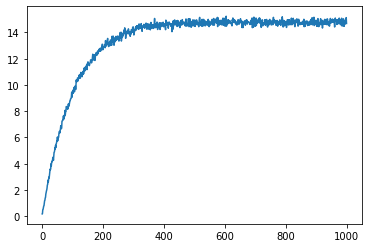

In [76]:
average_reward_list_0=[]
for t in range(steps):
    total_reward_at_t=0
    for player in range(2000):

        total_reward_at_t+=Rt_for_every_player_0[player][t]


    average_reward_at_t= total_reward_at_t/2000

    average_reward_list_0.append(average_reward_at_t)

plt.plot(range(steps), average_reward_list_0)